# Polynomial Expression
In mathematics, a polynomial expression contains multiple variables (also called indeterminates) and coefficients, involving only the operations of addition, subtraction, multiplication.

An example of polynomial expression in two variables:
\begin{equation}
f(x,y) = x^3 + 2xy^2 − xy + 1
\end{equation}


## Single-variable Polynomial

For a polynomial expression in one variable of maximum degree $n$:
\begin{equation}\label{eq:}
f(x) = \sum_{i=0}^{n} c_i x^i
\end{equation}

## Polynomial Regression

\textbf{Task}:
1. Define a sing-variable polynomial function and visualize the line in a 2D space
2. Prepare a training set by sampling points from the single-variable polynomial function, and visualize the set in a D space.
3. Polymonial Regression: Find a polymonial function to best fit the training set.  Solving by scikit-learn.

### 1.  Polynomial function definition

Here we define the function of degree 4 as:

\begin{equation}\label{eq:f(x)}
f(x) = 1 -5x -4x^2 +2x^3 - x^4
\end{equation}


In [1]:
coefficients=[1., -5., -4., 2., -1]
# Solution 1: Using numpy.polynomial lib
# The returned p is function that maps an input to a value according to the polynomial coffecients.
import numpy as np
p = np.polynomial.Polynomial(coefficients)


# Solution 2: define the function manually
p = lambda x: sum([coefficients[i] * x**i for i in range(len(coefficients))])

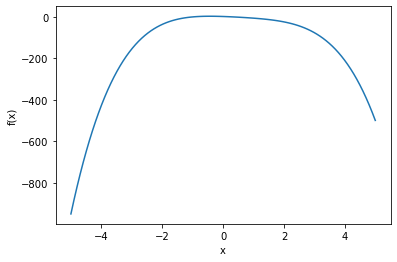

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-5., 5., 100)
y = p(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### 2.  Sampling and visualize the data from the defined function

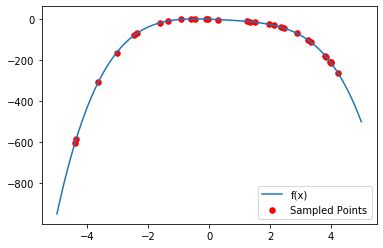

In [3]:
# Sample 30 points, value in range [-5, 5]
n_samples = 30
X = np.random.uniform(low=-5., high=5., size=n_samples)
Y = p(X)

plt.plot(x, y)
plt.scatter(X, Y, color='red', marker='o', s=30)
plt.legend(['f(x)', 'Sampled Points'])

### 3. Use Scikit-learn to solve the regression problem

\textbf{Scikit-learn}: Simple and efficient tools for predictive data analysis
(url:https://scikit-learn.org/stable/)

\textbf{Task}:

\textbf{Step 1}: Convert the training data to a polymonial space.

E.g.

$$
\begin{bmatrix} 
1 \\ 2 \\ 3
\end{bmatrix}
\to
\begin{bmatrix}
1^0 & 1^1& 1^2 & 1^3 \\
2^0 & 2^1& 2^2 & 2^3 \\
3^0 & 3^1& 3^2 & 3^3 \\
\end{bmatrix}
=
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & 2 & 4 & 8 \\
1 & 3 & 9 & 27 \\
\end{bmatrix}
$$


\textbf{Step 2}: Use \textbf{Linear Regression} in Scikit-Learn to solve the fit the training set.

In [4]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Transform to Polymonial space of a specific degree
ploy_fea = PolynomialFeatures(degree=3)
X_transform = ploy_fea.fit_transform(X[:, np.newaxis])

# Linear Regression
regression_model = LinearRegression(fit_intercept=False)
regression_model.fit(X_transform, Y[:, np.newaxis])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [5]:
# Visualize the coefficients of the regression model
print('Coefficients')
print('Ground Truth:', np.array(coefficients))
print('Prediction  :', regression_model.coef_[0])


Coefficients
Ground Truth: [ 1. -5. -4.  2. -1.]
Prediction  : [ 37.64693356  -3.07727116 -22.22794197   2.10781008]


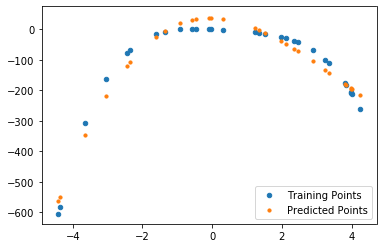

In [6]:
# Visualize the training points and predicted points
predicted_Y = regression_model.predict(X_transform)

plt.scatter(X, Y, s=20)
plt.scatter(X, predicted_Y, s=10)
plt.legend(['Training Points', 'Predicted Points'])

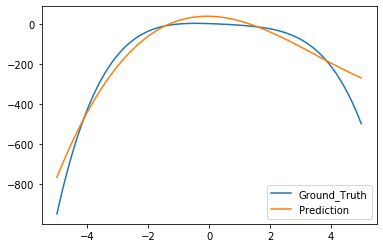

In [7]:
# Visualize the training points and predicted points
x = np.linspace(-5., 5., 100)
y = p(x)
x_transformed = ploy_fea.fit_transform(x[:, np.newaxis])
y_predicted = regression_model.predict(x_transformed)

plt.plot(x, y)
plt.plot(x, y_predicted)
plt.legend(['Ground_Truth', 'Prediction'])

## Altertively, change degree to 4

Coefficients
Ground Truth: [ 1. -5. -4.  2. -1.]
Prediction  : [ 1. -5. -4.  2. -1.]


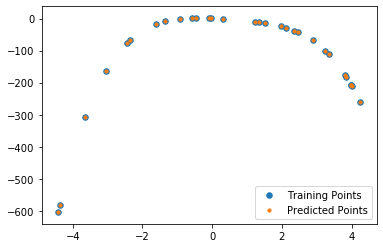

In [8]:
# Transform to Polymonial space of a specific degree
ploy_fea = PolynomialFeatures(degree=4)
X_transform = ploy_fea.fit_transform(X[:, np.newaxis])

# Linear Regression
regression_model = LinearRegression(fit_intercept=False)
regression_model.fit(X_transform, Y[:, np.newaxis])

# Visualize the coefficients of the regression model
print('Coefficients')
print('Ground Truth:', np.array(coefficients))
print('Prediction  :', regression_model.coef_[0])

# Visualize the training points and predicted points
predicted_Y = regression_model.predict(X_transform)

plt.scatter(X, Y, s=30)
plt.scatter(X, predicted_Y, s=10)
plt.legend(['Training Points', 'Predicted Points'])

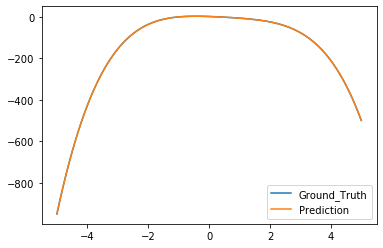

In [9]:
# Visualize the training points and predicted points
x = np.linspace(-5., 5., 100)
y = p(x)
x_transformed = ploy_fea.fit_transform(x[:, np.newaxis])
y_predicted = regression_model.predict(x_transformed)

plt.plot(x, y)
plt.plot(x, y_predicted)
plt.legend(['Ground_Truth', 'Prediction'])